# Newtonov interpolacijski polinom

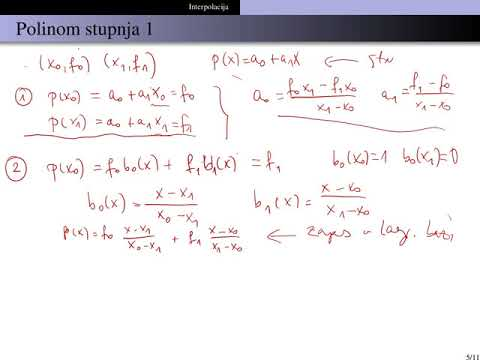

In [3]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("pd6gEaXx4kE")
display(vid)

Pogledajmo sada kako bismo implementirali interpolacijski polinom u Newtonovom obliku. Sljedeći kod sadrži funkciju koja izvrjednjava polinonom u danim točkama, te računa koeficijente interpolacijskog polinom au Newtonovoj bazi.

In [15]:
import numpy as np
from numpy import array,arange
from math import pi,cos
import matplotlib.pyplot as plt


def evalPoly(c,x,xu):
    n = len(x) - 1 # Degree of polynomial
    p = c[n]
    for k in range(1,n+1):
        p = c[n-k] + (xu -x[n-k])*p
    return p

def polycoef(x,y):
    n = len(x) # Number of data points
    c = y.copy()
    for j in range(1,n):
        c[j:n] = (c[j:n] - c[j-1])/(x[j:n] - x[j-1])
    return c

def NewtonInterp(x,y,xu):
    c = polycoef(x,y)
    yu = evalPoly(c,x,xu)
    return yu


U sljedećem dijelu rješavamo primjer s početka predavanja o interpolaciji.

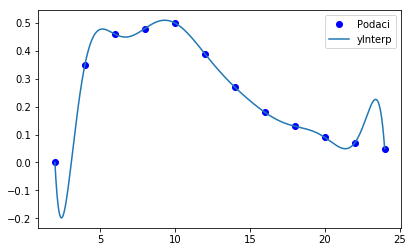

In [16]:
x=array([2 ,4 , 6, 8, 10 , 12, 14, 16, 18, 20, 22, 24])
y=array([0.0 ,0.35 , 0.46, 0.48, 0.50, 0.39,0.27,0.18,0.13,0.09, 0.07, 0.05])


xp = np.linspace(2, 24, 1000)
yu = NewtonInterp(x,y,xp)
    
fig, ax = plt.subplots(figsize=(6.5, 4))   
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(xp, yu,label="yInterp")
ax.legend(loc='upper right')
plt.savefig("interpolacijaNewton.eps") 

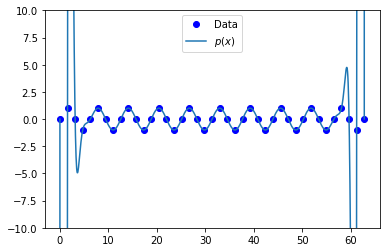

In [17]:
n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
y=np.sin(x)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
v=NewtonInterp(x,y,xu)
plt.plot(x,y,'bo', label="Data")
plt.plot(xu,v, label=r'$p(x)$')
plt.ylim(-10,10)
plt.legend(loc='upper center')
plt.savefig("Newton_pol.png") 